In [245]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [246]:
from sklearn import cross_validation
from sklearn import preprocessing

In [247]:
def plot_columns(X):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    
    sns.set(style="white", color_codes=True)

    g = sns.jointplot(x=X[:,0], y=X[:,1], size=3)

## Preprocessing

* what are the different preprocessing techniques
* visualize the change on the value distribution
* http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

#### Questions
* are all features centered around zero?
* have all features variance in the same order?
    * If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
* outliers?

### Standardize, Centering

* might behave badly if the individual feature do not more or less look like standard normally distributed data, http://scikit-learn.org/stable/modules/preprocessing.html

* Standardize ignores the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

* Standardization of cases should be approached with __caution because it discards information__. If that information is irrelevant, then standardizing cases can be quite helpful. If that information is important, then standardizing cases can be disastrous. http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

* Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

    * It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

#### Uniform

* column data follow uniform distribution
* columns have different distribution parameters

In [248]:
X = np.array([np.random.uniform(-1, 1, size=100),
              np.random.uniform(-5, 0, size=100),
              ]).T

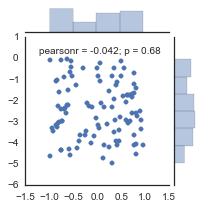

In [249]:
plot_columns(X)

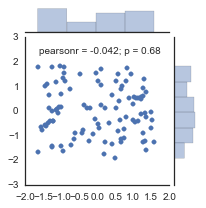

In [250]:
X_scaled = preprocessing.scale(X)
plot_columns(X_scaled)

In [251]:
print X_scaled.mean(axis=0)
print X_scaled.std(axis=0)

[ -3.10862447e-17  -1.53210777e-16]
[ 1.  1.]


#### Normal

* column data follow normal distribution
* columns have different distribution parameters

In [252]:
X = np.array([np.random.normal(-1, 3, size=100),
              np.random.normal(-12, 8, size=100),
              ]).T

In [253]:
X_scaled = preprocessing.scale(X)

print X_scaled.mean(axis=0)
print X_scaled.std(axis=0)

[ -1.88737914e-17   2.30371278e-16]
[ 1.  1.]


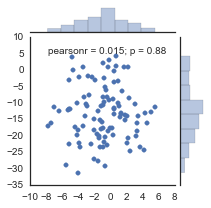

In [254]:
plot_columns(X)

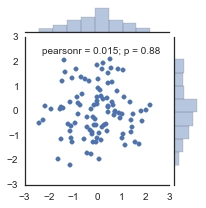

In [255]:
plot_columns(X_scaled)

#### Exponential

In [256]:
X = np.array([np.random.exponential(1/(1/1.5), 100),
              np.random.exponential(1/(1/4.5), 100),
              ]).T

In [257]:
X_scaled = preprocessing.scale(X)

print X_scaled.mean(axis=0)
print X_scaled.std(axis=0)

[  2.66453526e-17  -2.69229083e-17]
[ 1.  1.]


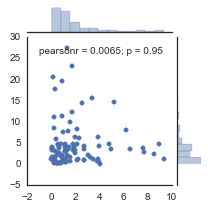

In [258]:
plot_columns(X)

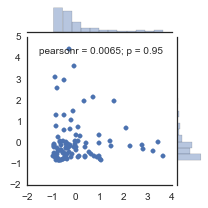

In [259]:
plot_columns(X_scaled)

#### Simple Sequence

In [260]:
X = np.array([[0,1,2,3],
              [50,51,52,53]
             ]).T.astype(float)
X

array([[  0.,  50.],
       [  1.,  51.],
       [  2.,  52.],
       [  3.,  53.]])

In [261]:
X_scaled = preprocessing.scale(X)
X_scaled

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [262]:
print X_scaled.mean(axis=0)
print X_scaled.std(axis=0)

[ 0.  0.]
[ 1.  1.]


### Scaling

* scaling features to lie between a given minimum and maximum value
* robustness to very small standard deviations of features and preserving zero entries in sparse data

In [263]:
minmax_scaler = preprocessing.MinMaxScaler()

#### Simple Sequence

In [264]:
X = np.array([[0,1,2,3],
              [50,51,52,53]
             ]).T.astype(float)
X

array([[  0.,  50.],
       [  1.,  51.],
       [  2.,  52.],
       [  3.,  53.]])

In [265]:
minmax_scaler.fit_transform(X)

array([[ 0.        ,  0.        ],
       [ 0.33333333,  0.33333333],
       [ 0.66666667,  0.66666667],
       [ 1.        ,  1.        ]])

### Whitening
* model makes some assumption on the linear independence of the features
* further remove the linear correlation across features

In [266]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)

In [267]:
X_scaled = pca.fit_transform(X)
X_scaled

array([[-1.34164079, -0.4472136 ],
       [-0.4472136 ,  1.94014916],
       [ 0.4472136 ,  0.05985084],
       [ 1.34164079,  0.17955251]])

In [268]:
print X_scaled.mean(axis=0)
print X_scaled.std(axis=0)

[ 0.          0.43308473]
[ 1.          0.90135321]


### Normalize

* Normalization is the process of scaling individual __samples to have unit norm__.

* This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

* It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

In [269]:
preprocessing.normalize(X)

array([[ 0.        ,  1.        ],
       [ 0.01960407,  0.99980782],
       [ 0.03843312,  0.99926117],
       [ 0.05651331,  0.99840185]])

### L1, L2 Regularizers for Linear Models

## Estimator Performance

* experiment with various value distributions in the features

* preprocess the data (standardize, normalize, ..)
    * find out in which cases what difference can be measured on estimator performance

In [270]:
X, y = None, None

In [271]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                    X.astype(float), y,
                                    test_size=0.4, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

clf = LogisticRegression().fit(X_train_transformed, y_train)

X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

AttributeError: 'NoneType' object has no attribute 'astype'

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X.astype(float), y,
    test_size=0.4, random_state=0)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_transformed = min_max_scaler.fit_transform(X_train)

clf = LogisticRegression().fit(X_train_transformed, y_train)

X_test_transformed = min_max_scaler.transform(X_test)
clf.score(X_test_transformed, y_test)